In [1]:
import pandas as pd

# Load the Excel file
file_path = 'response_data.xlsx'
df = pd.read_excel(file_path, header=0)

# Display the first few rows of the dataframe
df.head()

,Response_ID,Timestamp,Age:,Gender:,"Education: What is the highest degree or level of school you have completed? If currently enrolled, highest degree received.","1. Imagine you have several IoT devices at home, like a smart thermostat, a voice assistant, and smart lights.\nHow aware are you of the privacy risks associated with these IoT devices?",2. Your voice assistant records and stores all your voice commands for improving its service.\nHow concerned are you about the privacy of the voice recordings stored by your voice assistant?,3. Imagine a scenario where your smart home camera can be accessed remotely by unauthorized users. \nHow concerned are you about the possibility of unauthorized access to your smart home cameras?,4. You find out that your fitness tracker shares your health data with third-party companies. \nHow important is it to you that your IoT devices have clear privacy policies about data sharing?,5. You notice that your smart TV is showing ads related to your recent conversations and search history. \nHow concerned are you about IoT devices collecting and using your personal information for targeted advertising?,...,12. You receive a high-risk alert while using a public WiFi network.\nHow likely are you to disconnect from the public WiFi immediately after receiving this alert?,13. You receive an alert informing you of a low-risk IoT device nearby.\nHow likely are you to ignore a low-risk alert compared to a high-risk one?,14. You receive an alert while traveling in a foreign country.\nHow likely are you to take action on privacy alerts while abroad compared to when at home?,15. You receive alerts that include recommendations for IoT devices with better privacy protections.\nHow likely are you to consider switching to recommended IoT devices with better privacy protections?,1. An alert includes a visual representation of the nearby IoT device.\nHow helpful do you find visual representations in understanding and responding to privacy risks?,2. You have the option to customise the frequency and type of alerts you receive.\nHow important is the ability to customise alert settings to you?,3. An alert allows you to report any issues or inaccuracies.\nHow important is the option to report issues or inaccuracies in the alerts?,"4. You receive a follow-up alert confirming that an action you took (e.g., disabling Bluetooth) mitigated the risk.\nHow likely are you to feel reassured by follow-up alerts confirming the effectiveness of your actions?",5. The alerts are rated by other users for their helpfulness.\nHow likely are you to consider user ratings when deciding to act on an alert?,6. The alert system uses machine learning to provide more personalised risk assessments.\nHow comfortable are you with the use of machine learning to personalise your privacy risk alerts?
0,1,2024-06-26 12:16:24.967,18 - 30,Female,"Graduate degree (e.g.: Master, PhD or above)",2,4,5,4,2,...,5,2,5,3,5,5.0,4,4,5,3
1,2,2024-06-26 12:16:30.585,31 - 44,Female,Bachelor’s degree,1,5,5,2,4,...,5,5,4,4,5,5.0,5,4,2,4
2,3,2024-06-26 12:43:27.972,18 - 30,Male,"Graduate degree (e.g.: Master, PhD or above)",4,4,5,3,4,...,1,4,3,4,4,5.0,5,4,4,4
3,4,2024-06-26 13:06:51.209,18 - 30,Prefer not to say,Bachelor’s degree,3,5,5,1,4,...,5,3,3,5,5,5.0,4,5,5,2
4,5,2024-06-26 13:18:57.449,18 - 30,Male,Bachelor’s degree,4,5,4,5,3,...,3,3,4,2,4,4.0,3,4,3,4


In [27]:
# Mapping of original values to new values
value_mapping = {
    1: 0,
    2: 0.25,
    3: 0.5,
    4: 0.75,
    5: 1
}

# Exclude 'Response_ID' column from the transformation
columns_to_transform = [col for col in df.columns if col != 'Response_ID']

# Apply the mapping to the relevant columns
df[columns_to_transform] = df[columns_to_transform].replace(value_mapping)

# Display the first few rows of the transformed dataframe to verify the changes
print(df.head())

   Response_ID               Timestamp     Age:            Gender:  \
0            1 2024-06-26 12:16:24.967  18 - 30             Female   
1            2 2024-06-26 12:16:30.585  31 - 44             Female   
2            3 2024-06-26 12:43:27.972  18 - 30               Male   
3            4 2024-06-26 13:06:51.209  18 - 30  Prefer not to say   
4            5 2024-06-26 13:18:57.449  18 - 30               Male   

  Education: What is the highest degree or level of school you have completed? If currently enrolled, highest degree received.  \
0       Graduate degree (e.g.: Master, PhD or above)                                                                             
1                                  Bachelor’s degree                                                                             
2       Graduate degree (e.g.: Master, PhD or above)                                                                             
3                                  Bachelor’s degree       

In [30]:
# Save the column names to a text file
column_names = df.columns.tolist()
column_names_path = 'column_names.txt'
# with open(column_names_path, 'w') as file:
#     for column in column_names:
#         file.write(column + '\n')

In [39]:
column_names[37]

'1. You receive a notification about a privacy risk via a pop-up window on your phone.\nHow effective do you find pop-up notifications in prompting you to take action?'

## 1.不同年龄的对于method的选取的雷达图：

提取了第38、39和40列，并重命名为pop-up、vibration和audible_alert。

将Age:列中的年龄分组映射为“younger than 44”和“older than 45”。

计算了不同年龄组中其他三列的平均值。

绘制了两个不同年龄组的雷达图。

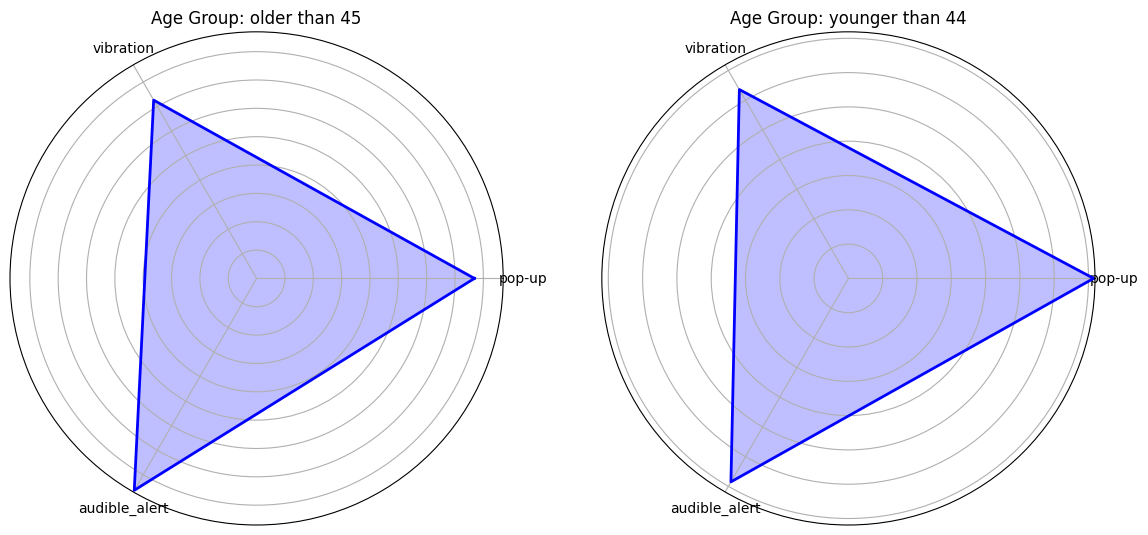

In [41]:
# Renaming the specified columns using the correct method
df = df.rename(columns={df.columns[37]: 'pop-up', df.columns[38]: 'vibration', df.columns[39]: 'audible_alert'})

# Extracting the relevant columns
df_extracted = df[['pop-up', 'vibration', 'audible_alert', 'Age:']].rename(columns={'Age:': 'age'})

# Map age groups to 'younger than 44' and 'older than 45'
age_mapping = {
    '18 - 30': 'younger than 44',
    '31 - 44': 'younger than 44',
    '45 - 59': 'older than 45',
    'Above 60': 'older than 45'
}
df_extracted['age'] = df_extracted['age'].map(age_mapping)

# Calculate the mean values for pop-up, vibration, and audible_alert by age group
mean_values = df_extracted.groupby('age').mean()

# Create radar charts
import matplotlib.pyplot as plt
import numpy as np

categories = ['pop-up', 'vibration', 'audible_alert']
labels = categories

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

fig, ax = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

for i, age_group in enumerate(mean_values.index):
    values = mean_values.loc[age_group].tolist()
    values += values[:1]
    ax[i].fill(angles, values, color='b', alpha=0.25)
    ax[i].plot(angles, values, color='b', linewidth=2)
    ax[i].set_yticklabels([])
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels)
    ax[i].set_title(f'Age Group: {age_group}')

plt.show()


### 下图有相同的圈数，但是不能直观的表现每一个方法对于不同年龄层的影响

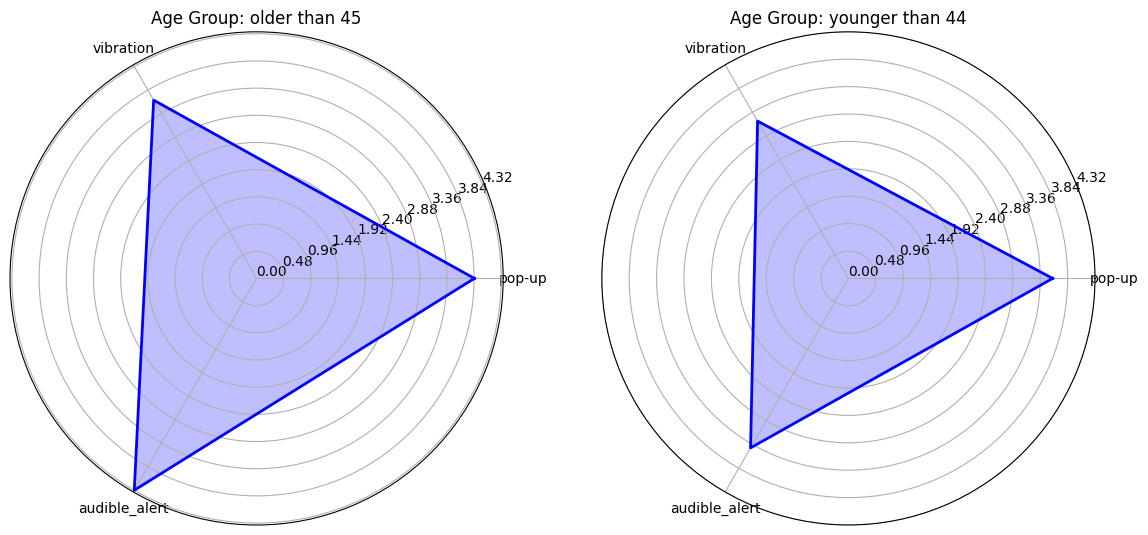

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['pop-up', 'vibration', 'audible_alert']
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Find the maximum value to standardize the radar charts
max_value = max(mean_values.max())

fig, ax = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

for i, age_group in enumerate(mean_values.index):
    values = mean_values.loc[age_group].tolist()
    values += values[:1]
    ax[i].fill(angles, values, color='b', alpha=0.25)
    ax[i].plot(angles, values, color='b', linewidth=2)
    ax[i].set_yticks(np.linspace(0, max_value, 10))
    ax[i].set_yticklabels([f'{x:.2f}' for x in np.linspace(0, max_value, 10)])
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(categories)
    ax[i].set_title(f'Age Group: {age_group}')

plt.show()